In [1]:
#todo 
#references 
#make it look like a presentation

# <center> Cross-immunity of 2 strains of type A Influenza

This project aims to show the effect of cross-immunity on H1N1 and H3N2 strains of Influenza A with the example of Italy.

For simplicity, the compartmental model chosen to describe the spread of the strains is SIRS. The model's parameters' values are chosen to be compatible with Italy. The data obtained from the simulation of the model is then compared to the sentinel data from FlueNet(referene link). The parameters are then adjusted to match the data as much as possible in order to recreate the incidence data fromm FlueNet. 

According to a [case study](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007989) made on Hong-Kong the SIRS model was able to represent the observed epidemic dynamics for subtypes A and B and the 2 strains of A for a 20 year period. As a base for modeling Italy's dynamics the same model was chosen, however only for the 2 strains of subtype A. The dynamics that was monitored in this project is for 131 weeks.   

We start by visualizing the data from Fluenet. We can see both sentinel and non-sentinel data, however we will only be working with sentinel one, since both of them are very similar. The data represents as mentioned 131 weeks during the years 2012-2019. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
np.random.seed(0)
from scipy.integrate import odeint,solve_ivp


/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#import data 2012-2019 Italy sentinel
data = pd.read_excel('influenza_it.xlsx')
h1n1 = data['AH1N12009']
h3n2 = data['AH3']
H1N1 = h1n1.to_numpy()
H3N2 = h3n2.to_numpy()
data_n = pd.read_excel('it_non-sen.xlsx')
h1n1_n = data['AH1N12009']
h3n2_n = data['AH3']
H1N1_n = h1n1_n.to_numpy()
H3N2_n = h3n2_n.to_numpy()
spec = data['SPEC_PROCESSED_NB'].to_numpy() #specimen processed
norm_H1N1 = H1N1/sum(spec)
norm_H1N1_n = H1N1_n/sum(spec)
norm_H3N2 = H3N2/sum(spec)
norm_H3N2_n = H3N2_n/sum(spec)

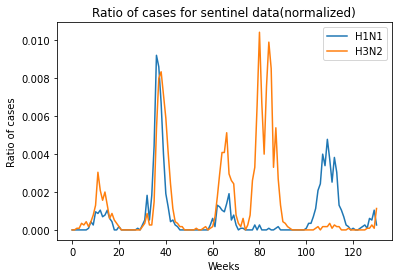

In [9]:
plt.plot(norm_H1N1,label = "H1N1")
plt.plot(norm_H3N2,label = "H3N2")
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Ratio of cases')
plt.title("Ratio of cases for sentinel data(normalized)")
plt.show()

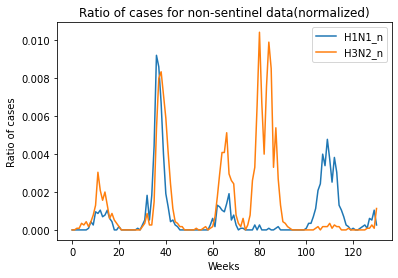

In [11]:
plt.plot(H1N1_n/sum(spec), label = 'H1N1_n')
plt.plot(H3N2_n/sum(spec), label = 'H3N2_n')
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Ratio of cases')
plt.title("Ratio of cases for non-sentinel data(normalized)")
plt.show()

The equations to describe the epidemic dynamics in the article mentioned above are the following: 
$$\frac{dS _i}{dt} = - \sum _{j}\frac{c _{ij}\beta_{j}S_{j}I_{j}}{N} + \frac{N-S_{i}-I_{i}}{L_{i}} + \mu(N-S_{i})-\alpha$$
$$ \frac{dI_{i}}{dt} = \frac{\beta _{i}S_{i}I_{i}}{N} - \frac{I_{i}}{D_{i}}  - \mu I_{i} + \alpha$$ 

Here $ c_{ij}$ is the cross-immunity the $i$ strain gives to strain $j$, $beta_{i}$ is the transmission rate of $i$ strain, $L_{i}$ is the immunity period of strain $i$ therefore $ \frac {1}{L_{i}} $ is the waning of immunity.

In [12]:
# model
def SIRS(y, t, N, beta_1, beta_2, gamma_1, gamma_2, mu, c_12, c_21, L_1,L_2):
    
    S_1, I_1, R_1, S_2, I_2, R_2 = y
    
    dS_1dt = mu*N - c_21*beta_1*S_1*I_1/N - c_21*beta_2*S_1*I_2/N + R_1/L_1 - mu*S_1 - alpha 
    dI_1dt = beta_1*S_1*I_1/N  - gamma_1*I_1 - mu*I_1 +alpha
    dR_1dt = gamma_1*I_1 - R_1/L_1 - mu*R_1
    dS_2dt = mu*N - c_12*beta_1*S_2*I_1/N - c_12*beta_2*S_2*I_2/N + R_2/L_2 - mu*S_2 - alpha
    dI_2dt = beta_2*S_2*I_2/N  - gamma_2*I_2 - mu*I_2 +alpha
    dR_2dt = gamma_2*I_2 - R_2/L_2 - mu*R_2
    
    return dS_1dt, dI_1dt, dR_1dt, dS_2dt, dI_2dt, dR_2dt
def plot_model(solution):
    
    S_1, I_1, R_1, S_2, I_2, R_2 = solution
    plt.figure(figsize=(10, 6))
    plt.plot(t, S_1, label='S1(t)')
    plt.plot(t, I_1, label='I1(t)')
   #plt.plot(t, R_1, label='R1(t)')
    plt.plot(t, S_2, label='S2(t)')
    plt.plot(t, I_2, label='I2(t)')
   # plt.plot(t, R_2, label='R2(t)')
    plt.xlabel('Days')
    plt.ylabel('Proportion of Population')
    plt.title('2-Strain SIRS Model with Cross-Immunity and Waning of Immunity')
    plt.legend()
    plt.show()

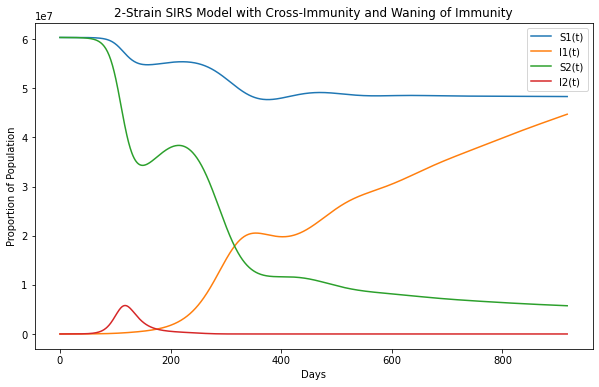

In [13]:
# Initial conditions
N = 60326250  # total population
I_1 = 1000  # initial infected of strain 1
R_1 = 20  # initial recovered of strain 1
I_2 = 50  # initial infected of strain 2
R_2 = 10  # initial recovered of strain 2
S_1 = N - I_1 - I_2  # initial number of susceptible individuals
S_2 = N - I_1 - I_2 
# Initial conditions vector
y0 = S_1, I_1, R_1, S_2, I_2, R_2
# Simulation time
t_max = 131*7 # days
t = np.linspace(0, t_max, t_max+1)


# Parameters
beta_1 = 0.2  # transmission rate of strain 1
beta_2 = 0.3  # transmission rate of strain 2
D1 = 2.64 #days
D2 = 3.03 #mean infect period
gamma_1 = 0.15 # recovery rate should be 1/D1 
gamma_2 = 0.2
m = np.mean([9.014,8.839,8.597,8.354,8.112,7.869,7.627,7.509,10.045,10.121,10.192,10.262,10.333,10.403,10.474,10.566])
mu = m/1000  # birth rate = death rate (defined as number of births/deaths per 1000 population)
c_12 = 0.6  # cross-immunity from strain 1 to strain 2  
c_21 = 0.09 # cross-immunity from strain 2 to strain 1
L_1 = 3.12*360 #year*days immunity period
L_2 = 2.28*360 #waning rate = 1/L1    
alpha = 0.1 * N//100000 #0.1 per 100000 - travel parameter


# Integrate the SIRS equations over the time grid, t

sol = odeint(SIRS, y0, t, args=(N, beta_1, beta_2, gamma_1, gamma_2, mu, c_12, c_21, L_1,L_2))
S_1, I_1, R_1, S_2, I_2, R_2 = sol.T
plot_model(sol.T)



In [9]:

def incidence(I1,I2):
    inc1 = np.abs(np.diff(I1))/N #normalized
    inc2 = np.abs(np.diff(I2))/N
    return inc1, inc2
inc1,inc2 = incidence(I_1,I_2)


In [10]:
def compare(inc1, inc2):
    inc1_week = []
    inc2_week = []
    for i in range(int(len(inc1)/7)):
        a = 0 
        b = 0 
        for j in range(0,7):
            a = a+ inc1[i*j]
            b = b + inc2[i*j]
        inc1_week.append(a*0.227)
        inc2_week.append(b*0.193)

    plt.plot(inc1_week,label='simulation')
    plt.plot(norm_H1N1, label = 'data')
    plt.legend()
    plt.xlabel('weeks')
    plt.ylabel('ratio of infected')
    plt.title("Simulation vs data of H1N1")
    plt.show()


    plt.plot(inc2_week,label='simulation')
    plt.plot(norm_H3N2, label = 'data')
    plt.legend()
    plt.xlabel('weeks')
    plt.ylabel('ratio of infected')
    plt.title('Simulation vs data of H3N2')
    plt.show()

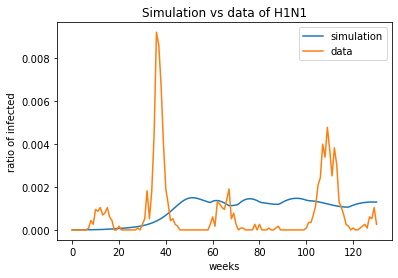

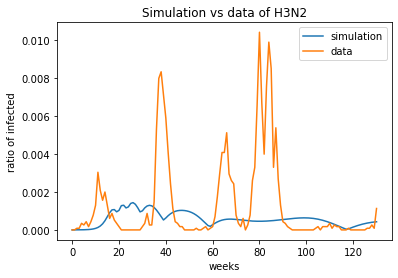

In [11]:
compare(inc1,inc2)

In [12]:
c12s = np.linspace(0.8,0.95,5)
c21s = np.linspace(0.1,0.2,5)
beta1s = np.linspace(0.2,0.35,5)
beta2s = np.linspace(0.3,0.8,5)
gamma1s = np.linspace(0.15,0.16,5)
gamma2s = np.linspace(0.1,0.26,5)
L1s = np.linspace(3*360,7*360,5)
L2s = np.linspace(1*360,5*360,5)
#params = zip(c12s,c21s,gamma1s,gamma2s,beta1s,beta2s,L1s,L2s)

In [ ]:
trials = []
for c12 in c12s:
    for c21 in c21s: 
        trial = odeint(SIRS, y0, t, args=(N, beta_1, beta_2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("C12 is",c12,"c21 is",c21)
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)


In [13]:
# C12 is 0.8375 c21 is 0.1
# C12 is 0.875 c21 is 0.125   best fits
c12 = (0.8375+0.875)/2
c21 = (0.1 + 0.125)/2


In [ ]:
trials = []
for beta1 in beta1s:
    for beta2 in beta2s: 
        trial = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("Beta 1  is", beta1,"beta2 is",beta2)
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)

In [14]:
beta1 = 0.300
beta2 = 0.435

In [ ]:
trials = []
for gamma1 in gamma1s:
    for gamma2 in gamma2s: 
        trial = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("Gamma 1 is",gamma1,"gamma2 is",gamma2)
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)


In [15]:
gamma1 = 0.15375
gamma2 = 0.26

In [ ]:
trials = []
for L1 in L1s:
    for L2 in L2s: 
        trial = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L1,L2))
        S_1, I_1, R_1, S_2, I_2, R_2 = trial.T
        print("L1 is",L1/360,"L2 is",L2/360,"years")
        plot_model(trial.T)
        inc1,inc2 = incidence(trial.T[1],trial.T[4])
        compare(inc1,inc2)


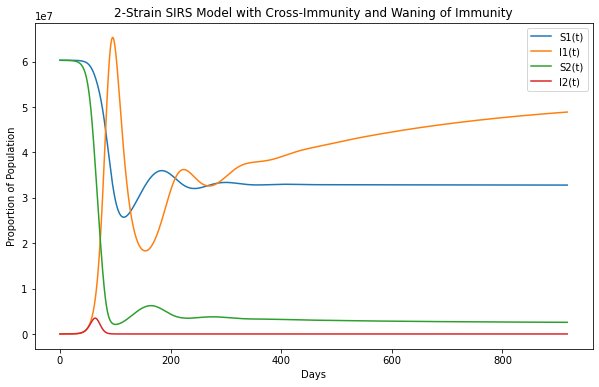

In [16]:
#no real difference, keep the suggestion in the paper
#final model 
sol = odeint(SIRS, y0, t, args=(N, beta1, beta2, gamma1, gamma2, mu, c12, c21, L_1,L_2))
S_1, I_1, R_1, S_2, I_2, R_2 = sol.T
plot_model(sol.T)

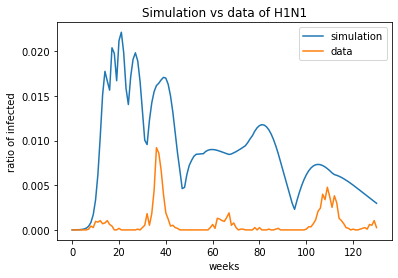

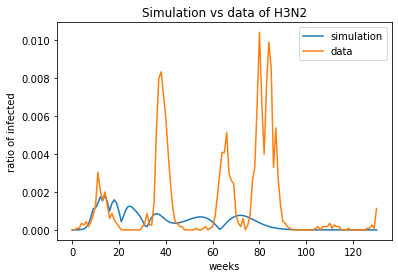

In [17]:
inc1,inc2 = incidence(I_1,I_2)
compare(inc1,inc2)